In [248]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [249]:
X=pd.read_csv('QL_train.csv')

In [250]:
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [251]:
X.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [252]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [253]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [254]:
X.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [255]:
#filling the numerical based values:
X['LoanAmount']=X['LoanAmount'].fillna(X['LoanAmount'].dropna().mean())
X['Loan_Amount_Term']=X['Loan_Amount_Term'].fillna(X['Loan_Amount_Term'].dropna().mean())

## EDA:

#### UNIVARIANT ANALYSIS:
* Here we are creating def fn for plotting the value count of various catogerical values:
 

In [256]:
#fn for catogerical variabel plot:
def plots(columns):
    plt.figure(figsize=(6,5))
    sns.countplot(X[columns],palette='Greens_r')
    plt.title(columns+'_Count')
    plt.show()    
    
#fn for continous variabel plot.
def numplot(num):
    fig,ax=plt.subplots(1,2)
    sns.distplot(X[num],color='g',ax=ax[0])
    sns.boxplot(X[num],color='g',ax=ax[1])
    plt.title(num+'_Distribution')
    plt.show()

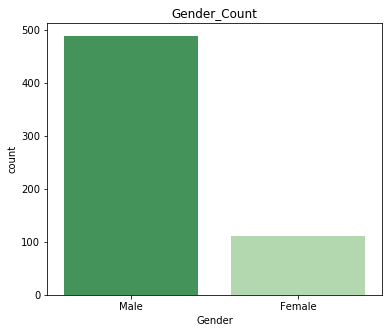

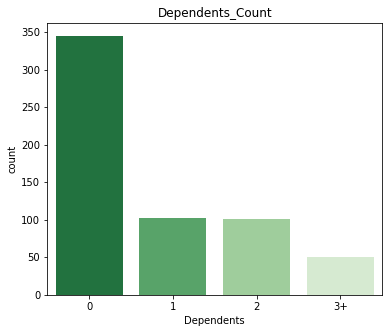

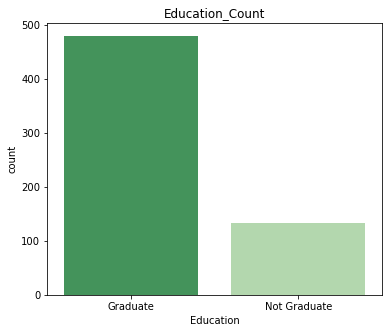

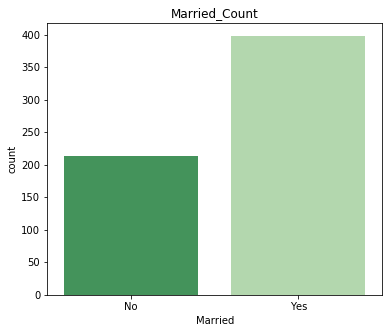

In [257]:
columns=['Gender','Dependents','Education','Married']

#Appending the columns list in created function:
for i in columns:
    plots(i)    

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


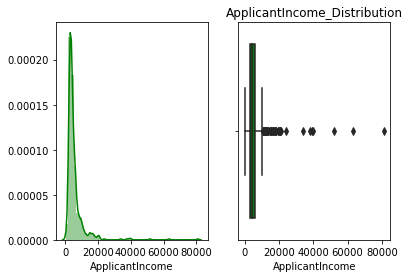

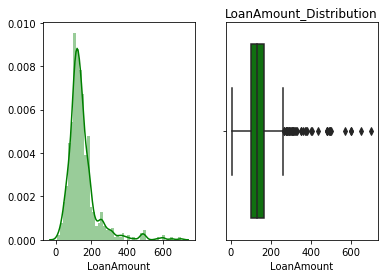

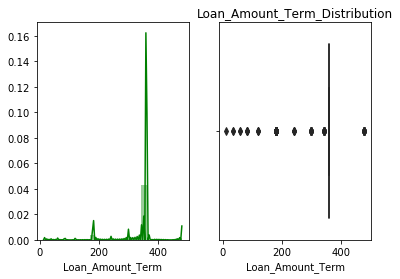

In [258]:
num=['ApplicantIncome','LoanAmount','Loan_Amount_Term']
for i in num:
        numplot(i)

#### BI-VARIANT ANALYSIS:

* Here we will perform the Multiple bivariant analysis considering Loan Satus as our Target Variabel: 

* LOAN APPROVAL BASED ON EDUCATION:

In [259]:
X['Education'].groupby(X['Loan_Status']).value_counts()

Loan_Status  Education   
N            Graduate        140
             Not Graduate     52
Y            Graduate        340
             Not Graduate     82
Name: Education, dtype: int64

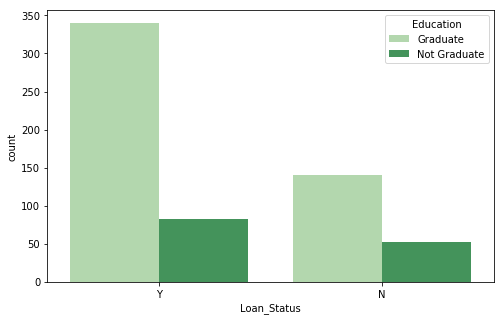

In [260]:
plt.figure(figsize=(8,5))
sns.countplot('Loan_Status',hue='Education',data=X,palette='Greens')
plt.show()

* Here we can see the loan approval rate being more among the graduate Applican than the non_graduates.

* LOAN APPROVAL BASED ON SELF EMPLOYMENT STATUS:

In [261]:
X['Self_Employed'].groupby(X['Loan_Status']).value_counts()

Loan_Status  Self_Employed
N            No               157
             Yes               26
Y            No               343
             Yes               56
Name: Self_Employed, dtype: int64

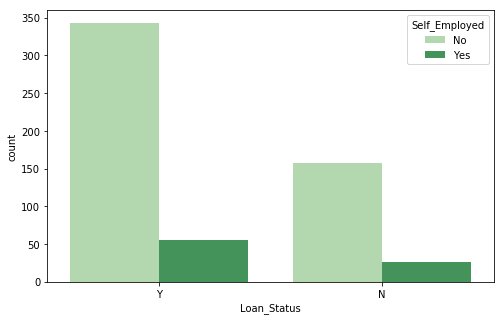

In [262]:
plt.figure(figsize=(8,5))
sns.countplot('Loan_Status',hue='Self_Employed',data=X,palette='Greens')
plt.show()

* From above plot we can see there is high approval rate amog applicant who are not self_employed.

* LOAN APPROVAL BASED ON DEPENDENTS:

In [263]:
X['Dependents'].groupby(X['Loan_Status']).value_counts()

Loan_Status  Dependents
N            0             107
             1              36
             2              25
             3+             18
Y            0             238
             2              76
             1              66
             3+             33
Name: Dependents, dtype: int64

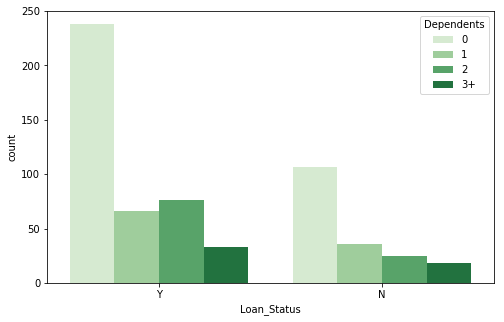

In [264]:
plt.figure(figsize=(8,5))
sns.countplot('Loan_Status',hue= 'Dependents',data=X,palette='Greens')
plt.show()

* From the above plot for depents vs loan approval we can see the approval change as the no. of depents for the applicant increase which being low approval for higher amount depents while high approval for applicant with 0 dependents. 

* LOAN APPROVAL BASED ON MARIAGE STATUS:

In [265]:
X['Married'].groupby(X['Loan_Status']).value_counts()

Loan_Status  Married
N            Yes        113
             No          79
Y            Yes        285
             No         134
Name: Married, dtype: int64

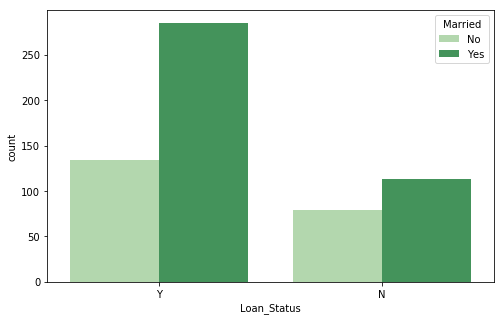

In [266]:
plt.figure(figsize=(8,5))
sns.countplot('Loan_Status',hue= 'Married',data=X,palette='Greens')
plt.show()

* From the Above plotted graph we can see that Loan approval is high among the married applicant.

* AVG LOAN AMOUNT & LOAN AMOUNT TERM BASED LOAN APPROVAL:
* Our Hypothesis says the loan Approval Rate Should Be High For Applicant with Low Loan Amount and With Less time period.

In [267]:
X['LoanAmount'].groupby(X['Loan_Status']).mean()

Loan_Status
N    150.945488
Y    144.349606
Name: LoanAmount, dtype: float64

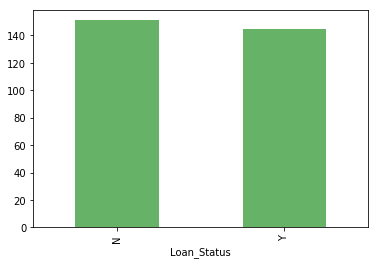

In [268]:
X['LoanAmount'].groupby(X['Loan_Status']).mean().plot(kind='bar',color='g',alpha=0.6)
plt.show()

* From the Above plotted distribution we cant predict the actual approval rate as it seems to be equal for both
* Therefore we'll distribute the amount in groups according to bins for more detailed analysis

In [269]:
lbin=[0,100,300,500]
groupl=['low','avg','high']
X['LoanAmountBins']=pd.cut(X['LoanAmount'],lbin,labels=groupl)

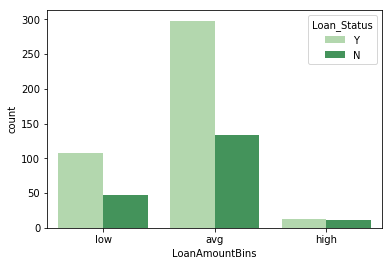

In [270]:
sns.countplot(X['LoanAmountBins'],hue=X['Loan_Status'],data=X,palette='Greens')
plt.show()

* As we can see among the distributed groups of Loan Amount the Average loan Amount has higher Approval rate which matchs our hypothesis being made earlier . 

* LOAN AMOUNT TERM BASED LOAN APPROVAL:

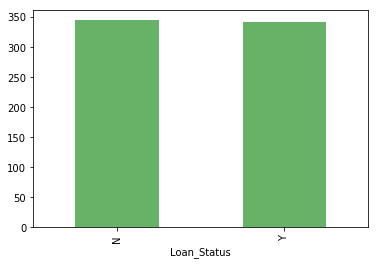

In [271]:
X['Loan_Amount_Term'].groupby(X['Loan_Status']).mean().plot(kind='bar',color='g',alpha=0.6)
plt.show()

In [272]:
X['Loan_Amount_Term_bins']=pd.cut(X['Loan_Amount_Term'],bins=[0,100,300,500],labels=['low','avg','high'])

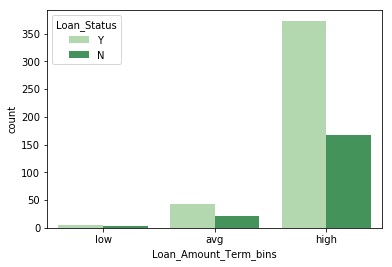

In [273]:
sns.countplot(X['Loan_Amount_Term_bins'],hue=X['Loan_Status'],data=X,palette='Greens')
plt.show()

* Here we can see as the loan term increases the approval rate also increases.
* Which somehow contraditcts to the hypothesis we made.

* APPLICANT AVRAGE INCOME BASED ON LOAN APPROVAL RATE.

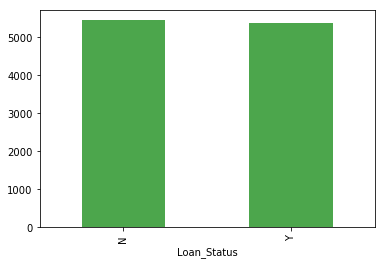

In [274]:
X['ApplicantIncome'].groupby(X['Loan_Status']).mean().plot(kind='bar',color='g',alpha=0.7)
plt.show()

* According to our hypothesis Applicant with more income should have higher chances of loan approval.
* But From the Above Distribution for Loan Status According to Applicant income Shows Equal Chances of Approval and Rejection 
* This dosent Provides a clear view for Approval Rate and Contradits our Hypothesis Therfore we'll Divide the income into number of bins in increasing order and labeling them into different classes. 

In [275]:
bins1=[0,2500,4000,6000,81000]
group1=['low','average','high','very high']

X['Income bins']=pd.cut(X['ApplicantIncome'],bins1,labels=group1)
pd.crosstab(X['Income bins'],X['Loan_Status'])

Loan_Status,N,Y
Income bins,,
low,34,74
average,67,159
high,45,98
very high,46,91


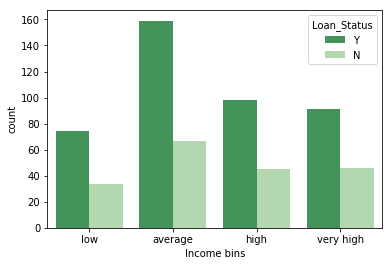

In [276]:
sns.countplot(X['Income bins'],hue=X['Loan_Status'],palette='Greens_r')
plt.show()

* From the above plot we can see most of approval rate lies in the categorey of Average income group which is still insufficient to assume the outcome as most of income group also have an coapplicant income amout which we have not considered.
* As the approval also depends on coapplicant income therefor we'll futher analys the coapplicant income form approval rate.    

In [277]:
X['Coapplicant bins']=pd.cut(X['CoapplicantIncome'],bins=[0,1000,3000,42000],labels=['low','average','high'])
pd.crosstab(X['Coapplicant bins'],X['Loan_Status'])

Loan_Status,N,Y
Coapplicant bins,,
low,3,19
average,61,161
high,32,65


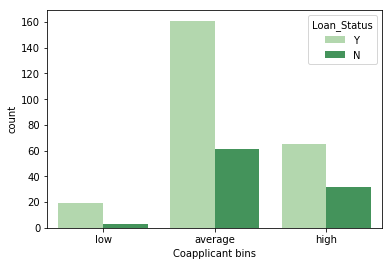

In [278]:
sns.countplot(X['Coapplicant bins'],hue=X['Loan_Status'],palette='Greens')
plt.show()

* Here we can see the Same output giving approval rate more for average income group as the Applicant income group is left out overe here so we cant rely on one factor well have to combine both Applicant And Coaaplicant income.

In [279]:
X['Total_income']=X['ApplicantIncome']+X['CoapplicantIncome']

In [280]:
X['Total Income Bins']=pd.cut(X['Total_income'],bins=[0,2500,4000,6000,81000],labels=['low','avg','high','very high'])
pd.crosstab(X['Total Income Bins'],X['Loan_Status'])

Loan_Status,N,Y
Total Income Bins,,
low,14,10
avg,32,87
high,65,159
very high,81,166


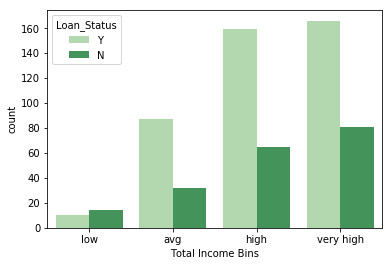

In [281]:
sns.countplot(X['Total Income Bins'],hue=X['Loan_Status'],palette='Greens')
plt.show()

* As we combie both of them we can see our hypothesis for Approval rate being more for higher income group is being Accepted. 
* Futher Analysing the overall Distribution of Total income 
.

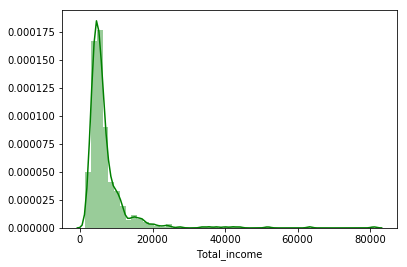

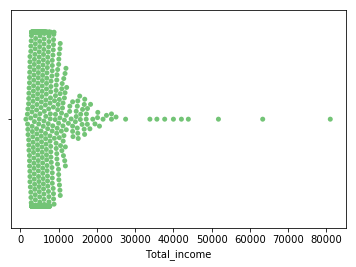

In [282]:
sns.distplot(X['Total_income'],color='g')
plt.show()
sns.swarmplot(X['Total_income'],palette='Greens')
plt.show()

* Here we can see uneven Distribution present in the overall distribution of total income
* Which can effect the performance of our model therefore applying iqr outlier treatment to make the distrbution evenly spread in bell shaped curve

## IQR:

In [283]:
Q1=X['Total_income'].quantile(0.25)
Q3=X['Total_income'].quantile(0.75)
X.shape

(614, 19)

In [284]:
IQR=Q3-Q1
X=X[~((X['Total_income']<(Q1-1.5*IQR)) | (X['Total_income']>(Q3+1.5*IQR)))]
X.shape

(564, 19)

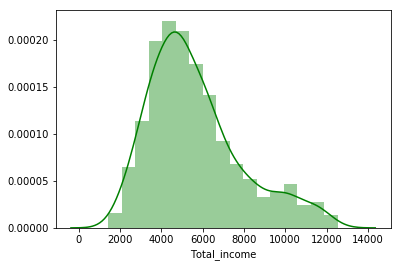

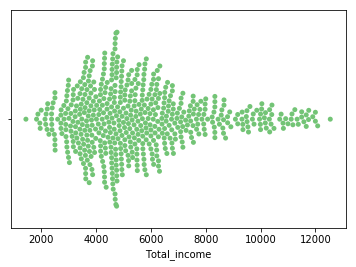

In [285]:
sns.distplot(X['Total_income'],color='g')
plt.show()
sns.swarmplot(X['Total_income'],palette='Greens')
plt.show()

#### FILLING CATOGERICAL NULL VALUES:

In [286]:
X['Gender']=X['Gender'].fillna(X['Gender'].dropna().mode()[0])
X['Married']=X['Married'].fillna(X['Married'].dropna().mode()[0])
X['Dependents']=X['Dependents'].fillna(X['Dependents'].dropna().mode()[0])
X['Self_Employed']=X['Self_Employed'].fillna(X['Self_Employed'].dropna().mode()[0])
X['Credit_History']=X['Credit_History'].fillna(X['Credit_History'].dropna().mode()[0])

#### LABELING NUMBERS FOR CATOGORICAL VALUES :

In [334]:
from sklearn.preprocessing import LabelEncoder

encode_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in encode_col:
    X[col] =le.fit_transform(X[col])

In [335]:
X[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']].head(4)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1


#### ASSIGNING VALUES FOR MODEL FEATURES AND TARGET :

In [336]:
x=X.drop(columns=['Loan_Status','Loan_ID','Total Income Bins','Coapplicant bins','Income bins','Loan_Amount_Term_bins','LoanAmountBins'],axis=1)
y=X['Loan_Status']

### SCALING VALUES:

* (As There Was Presence Of Un-Even Values along the Range of columns so Scaling them all under one scale ): 

In [337]:
from sklearn.preprocessing import StandardScaler

In [338]:
sc=StandardScaler()

In [339]:
x=sc.fit_transform(x) 

### BULDING MODEL: 

* HERE WE MADE A FUNCTION WHICH DOSE THE WORK IN FOLLOWING SEQUNCE:
* TAKES THE INPUT FROM (x,y VARIABEL) & TRAIN TEST SPLIT THE DATA AND CREATES X_TRAIN X_TEST Y_TRAIN Y_TEST
* TAKES THE INPUT FROM (MODEL VARIABEL) & FITS THE MODEL WITH TRAINING DATA
* CALCULATES THE CROSS VALIDATION SCORE FOR (MODEL,x,y) INPUTS.

In [340]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
def classifier1(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(X_train,Y_train)
    print('Model Score =',model.score(X_test,Y_test)*100)
    
    cross=cross_val_score(model,x,y,cv=5)
    print('Crossvalidation_score=',np.mean(cross)*100)
 

* LOGISTIC REGRESSION

In [341]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression() #input
classifier1(model,x,y)

Model Score = 78.01418439716312
Crossvalidation_score= 81.38432364096082


* DecisionTreeClassifier

In [342]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classifier1(model,x,y)

Model Score = 64.53900709219859
Crossvalidation_score= 74.64285714285714


* RandomForestClassifier

In [343]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classifier1(model,x,y)

Model Score = 78.01418439716312
Crossvalidation_score= 80.14538558786344


* KNeighborsClassifier

In [344]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
classifier1(model,x,y)

Model Score = 79.43262411347519
Crossvalidation_score= 78.90012642225031


* Naive Bayes 

In [345]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
classifier1(model,x,y)

Model Score = 77.30496453900709
Crossvalidation_score= 81.38590391908977


* As we can see Logistics Regression,Naive Bayes & Random Forest are Showing more Accuracy over others 
* But Naive Byes is quite constant with respect to the data,therefore we will be performing (Randomcv With Hyperparameter Tunning) on Logistics & Random Forest to improve the Accuracy of our Model.

#### HYPER PARAMETER TUNNING FOR RANDOM FOREST

In [346]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

parameters={'max_depth':[3,None],'min_samples_split':[2,3,4],'criterion':['gini','entropy']}

In [347]:
RF=RandomForestClassifier()
Forest_cv=RandomizedSearchCV(RF,parameters,cv=5)

In [348]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [349]:
Forest_cv.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [350]:
Y_predict=Forest_cv.predict(X_test)

In [351]:
Forest_cv.best_params_

{'min_samples_split': 2, 'max_depth': 3, 'criterion': 'gini'}

In [352]:
from sklearn.metrics import accuracy_score

In [353]:
score =  accuracy_score(Y_predict,Y_test)
score*100

78.01418439716312

* SCORE AFTER RANDOM CV AND HYPER PARAMETER TUNNING.

In [354]:
print(Forest_cv.best_score_*100)

82.74789915966387


#### EVALUATION:

In [355]:
from sklearn.metrics import confusion_matrix

In [356]:
cm=confusion_matrix(Y_predict,Y_test)
cm

array([[16,  2],
       [29, 94]], dtype=int64)

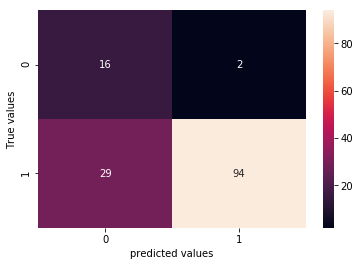

In [357]:
sns.heatmap(cm,annot=True)
plt.ylabel('True values')
plt.xlabel('predicted values')
plt.show()

#### TUNING FOR LOGISTIC REGG:

In [358]:
LR_PARAMETERS={'solver':['newton-cg', 'lbfgs', 'liblinear'],'penalty':['l1', 'l2', 'elasticnet', 'none'],
               'C':[100, 10, 1.0, 0.1, 0.01]}

In [359]:
LR=LogisticRegression()
LR_cv=RandomizedSearchCV(LR,LR_PARAMETERS,cv=5)

In [360]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [361]:
LR_cv.fit(X_train,Y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' w

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs

In [362]:
LR_Y_predict=LR_cv.predict(X_test)

In [363]:
LR_cv.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}

In [364]:
LR_Score= accuracy_score(LR_Y_predict,Y_test)
LR_Score*100

78.01418439716312

In [365]:
print(LR_cv.best_score_*100)

82.74789915966387


#### EVALUATION (LR) :

In [366]:
confusion_matrix(LR_Y_predict,Y_test)

array([[16,  2],
       [29, 94]], dtype=int64)

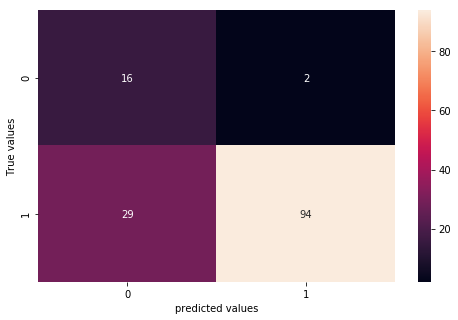

In [367]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(LR_Y_predict,Y_test),annot=True)
plt.ylabel('True values')
plt.xlabel('predicted values')
plt.show()

#### MODEL COMPARISION :

In [370]:
Model_comparision = pd.DataFrame({'Algorithm':['Logistic Regression','Decision Tree Classifier',
                                               'Random Forest Classifier','kNN','NaiveBayes',
                                               'Random Forest HyperTuned','Logistic Reggression HyperTuned'],
                                                'Accuracy':[78.01, 64.53,78.04,79.43,77.30,78.01,78.01],
                                                 'Cross Validation Score':[81.38,74.64, 80.14,78.90,81.38,82.74,82.74]})

In [371]:
Model_comparision.sort_values(ascending=False,by='Cross Validation Score')

,Algorithm,Accuracy,Cross Validation Score
5,Random Forest HyperTuned,78.01,82.74
6,Logistic Reggression HyperTuned,78.01,82.74
0,Logistic Regression,78.01,81.38
4,NaiveBayes,77.30,81.38
2,Random Forest Classifier,78.04,80.14
3,kNN,79.43,78.90
1,Decision Tree Classifier,64.53,74.64
